**✈️ Flight Delay Prediction**

**Introduction:-**

Flight delays are one of the most common operational challenges faced by the aviation industry, affecting airlines, airports, and millions of passengers every year. These delays lead to financial losses, scheduling disruptions, increased fuel consumption, and reduced customer satisfaction. Predicting flight delays in advance allows airlines to optimize operations, allocate resources efficiently, and provide timely information to passengers. With the growth of large-scale historical flight datasets, machine learning has become a powerful tool to analyze complex patterns in airline operations and forecast delays more accurately than traditional methods.

This project focuses on building an end-to-end Flight Delay Prediction System using advanced machine learning models. The workflow includes data exploration, preprocessing, feature engineering, handling class imbalance, and training models such as XGBoost, LightGBM, and CatBoost. Each model is evaluated using metrics like accuracy, precision, recall, F1-score, and confusion matrices to determine the most suitable approach for delay prediction. By leveraging these models, the goal is to develop a reliable and interpretable system that helps airlines minimize operational disruptions and enhance the overall travel experience for passengers.

**Business Problem:-**
Flight delays create significant operational and financial challenges for the aviation industry, leading to increased fuel consumption, crew overtime costs, disrupted airport logistics, and dissatisfied passengers. Airlines often struggle to anticipate delays due to the complex interactions between weather conditions, air traffic, aircraft maintenance, and scheduling constraints. Without accurate predictive insights, airlines cannot proactively manage resources, adjust flight operations, or provide timely communication to travelers. Therefore, the business problem is to develop a data-driven solution that can reliably predict potential flight delays before departure, enabling airlines to reduce operational inefficiencies, improve decision-making, and enhance customer experience.

**Problem Statement:-** Flight delays cause significant disruption to airline operations and negatively impact both customer satisfaction and financial performance. Traditional delay management relies heavily on reactive decision-making, which limits an airline’s ability to mitigate risks and optimize resources. Given the availability of large volumes of historical flight, weather, and operational data, there is a need to build an intelligent machine learning model capable of predicting whether a scheduled flight is likely to be delayed. The problem this project aims to solve is to accurately classify upcoming flights as “on time” or “delayed” based on multiple contributing features, enabling airlines to take proactive measures, reduce operational inefficiencies, and enhance service reliability.

**Solution Approach — How Our ML Pipeline Solves the Business Problem:-**

To address the critical business challenge of unpredictable flight delays, our project implements a robust Machine Learning pipeline that transforms raw operational data into accurate, actionable delay predictions. The pipeline begins with systematic data ingestion and preprocessing, where missing values, inconsistent formats, and highly correlated or leakage-prone features (such as actual departure/arrival times) are carefully handled. By engineering meaningful features such as scheduled times, airline information, distances, and weather-related factors, the pipeline ensures that only relevant, non-leakage variables are used for prediction.

The pipeline then incorporates advanced resampling techniques like SMOTE to balance the dataset, ensuring that the model learns effectively despite class imbalance. Multiple high-performing algorithms—including XGBoost, LightGBM, and CatBoost—are trained using standardized evaluation strategies, early stopping, and hyperparameter tuning. Each model is validated using metrics such as accuracy, precision, recall, F1-score, and a confusion matrix to ensure robust performance on unseen data. The best-performing model is selected and can be deployed to predict whether an upcoming flight is likely to be delayed. This predictive capability enables airlines to take proactive decisions, improve operational planning, allocate resources efficiently, and reduce the overall impact of flight delays on passengers and business operations.

**2. Importing Data & Initial Exploration**

In [1]:
# Install heavy libs first to avoid compilation issues.
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm catboost shap imbalanced-learn joblib tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.8 MB/s eta 0:00:00


This section imports all essential Python libraries required for building the flight delay prediction pipeline. It includes tools for data handling (Pandas, NumPy), visualization (Matplotlib, Seaborn), and progress tracking (tqdm). Key machine learning utilities from scikit-learn are used for preprocessing, model training, evaluation, and pipelines, along with SMOTE for handling imbalanced data. Advanced gradient boosting models—XGBoost, LightGBM, and CatBoost—are included to build high-performance predictive models. Additional libraries such as SHAP support model explainability, while joblib helps save trained models. Finally, system-level utilities help manage warnings, memory, and file operations to ensure smooth execution of the ML workflow.

In [2]:
# Data handling
import pandas as pd
import numpy as np
import datetime as dt

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Display & progress
from tqdm.notebook import tqdm

# Preprocessing & utilities
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve
)
from sklearn.utils import class_weight

# Imbalanced data handling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Models (boosting)
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

# Explainability
import shap

# Saving models
import joblib

# System / performance
import os
import gc
import warnings
warnings.filterwarnings('ignore')


**2.1 Load Dataset**

In [4]:
# 2.1 Load Dataset
file_path = "/content/flight_data_2024.csv"

# Load the dataset
df = pd.read_csv(file_path)

print("Dataset loaded successfully!")


Dataset loaded successfully!


**Display First 5 Rows**

In [ ]:
# Display first few rows
df.head()


,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,...,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,1,1,1,2024-01-01,9E,4814.0,JFK,"New York, NY",New York,...,0.0,136.0,122.0,84.0,509.0,0.0,0.0,0.0,0.0,0.0
1,2024,1,1,1,2024-01-01,9E,4815.0,MSP,"Minneapolis, MN",Minnesota,...,0.0,130.0,114.0,88.0,622.0,0.0,0.0,0.0,0.0,0.0
2,2024,1,1,1,2024-01-01,9E,4817.0,JFK,"New York, NY",New York,...,0.0,106.0,90.0,61.0,288.0,0.0,0.0,0.0,0.0,0.0
3,2024,1,1,1,2024-01-01,9E,4817.0,RIC,"Richmond, VA",Virginia,...,0.0,111.0,76.0,51.0,288.0,0.0,0.0,0.0,0.0,0.0
4,2024,1,1,1,2024-01-01,9E,4818.0,DTW,"Detroit, MI",Michigan,...,0.0,79.0,70.0,45.0,237.0,0.0,0.0,0.0,0.0,0.0


**Check Shape of the Dataset**

In [5]:
# Check number of rows and columns
print("Dataset Shape:", df.shape)


Dataset Shape: (211330, 35)


**2.2 Data Overview**

In [6]:
# Column names
print("Column Names:")
print(df.columns.tolist())

Column Names:
['year', 'month', 'day_of_month', 'day_of_week', 'fl_date', 'op_unique_carrier', 'op_carrier_fl_num', 'origin', 'origin_city_name', 'origin_state_nm', 'dest', 'dest_city_name', 'dest_state_nm', 'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled', 'cancellation_code', 'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'distance', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']


In [7]:
# Data types of each column
print("Data Types:")
print(df.dtypes)

Data Types:
year                     int64
month                    int64
day_of_month             int64
day_of_week              int64
fl_date                 object
op_unique_carrier       object
op_carrier_fl_num      float64
origin                  object
origin_city_name        object
origin_state_nm         object
dest                    object
dest_city_name          object
dest_state_nm           object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled                int64
cancellation_code       object
diverted               float64
crs_elapsed_time       float64
actual_elapsed_time    float64
air_time               float64
distance               float64
carrier_delay          float64
weather_delay          floa

The summary statistics provide an overview of all numerical features in the flight dataset. They show the count of available values, along with key metrics such as mean, standard deviation, minimum, quartiles, and maximum for each column. From the statistics, we see that the dataset contains over 211,000 flight records with variables like departure time, delay duration, airtime, distance, and elapsed times. Many delay-related columns (carrier, weather, NAS, security, late aircraft) have a median of zero, indicating that most flights experience no delays, while the maximum values reveal the presence of extreme delay cases. The dataset also shows missing values in some operational time columns (e.g., dep_time, taxi_out, actual_elapsed_time), confirming the need for careful preprocessing. Overall, the descriptive statistics help identify distribution patterns, outliers, and data quality issues crucial for building an accurate delay prediction model.

In [8]:
# Summary statistics for numerical columns
df.describe()

,year,month,day_of_month,day_of_week,op_carrier_fl_num,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,...,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,211330.0,211330.0,211330.000000,211330.000000,211330.000000,211330.000000,206033.000000,206006.000000,205844.000000,205844.000000,...,211329.000000,211329.000000,205104.000000,205104.000000,211329.000000,211329.000000,211329.000000,211329.000000,211329.000000,211329.000000
mean,2024.0,1.0,6.370326,3.567047,2304.392755,1324.997147,1329.941398,14.404085,18.878272,1353.195119,...,0.003336,150.806832,145.277469,118.196413,850.229088,5.164861,1.439504,3.195411,0.052203,6.362459
std,0.0,0.0,3.401714,1.858135,1566.794600,492.024654,507.291617,60.287125,10.919797,508.673495,...,0.057662,74.004918,73.588189,71.556226,599.968886,37.321977,21.819767,16.380493,1.607542,31.847495
min,2024.0,1.0,1.000000,1.000000,1.000000,6.000000,1.000000,-43.000000,1.000000,1.000000,...,0.000000,26.000000,17.000000,8.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024.0,1.0,3.000000,2.000000,1057.000000,905.000000,909.000000,-5.000000,12.000000,927.000000,...,0.000000,96.000000,91.000000,65.000000,406.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2024.0,1.0,6.000000,3.000000,2041.000000,1320.000000,1325.000000,-1.000000,16.000000,1339.000000,...,0.000000,135.000000,130.000000,102.000000,719.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2024.0,1.0,9.000000,5.000000,3388.750000,1735.000000,1744.000000,11.000000,22.000000,1758.000000,...,0.000000,182.000000,179.000000,150.000000,1085.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2024.0,1.0,12.000000,7.000000,8819.000000,2359.000000,2400.000000,3125.000000,169.000000,2400.000000,...,1.000000,690.000000,717.000000,664.000000,5095.000000,2884.000000,1112.000000,1388.000000,380.000000,1565.000000


In [9]:
# Summary for categorical columns
df.describe(include='object')

,fl_date,op_unique_carrier,origin,origin_city_name,origin_state_nm,dest,dest_city_name,dest_state_nm,cancellation_code
count,211330,211330,211330,211330,211330,211330,211330,211330,5520
unique,12,15,333,327,52,334,328,52,3
top,2024-01-02,WN,ATL,"Chicago, IL",California,ATL,"Chicago, IL",California,B
freq,18977,43097,9916,10293,22627,9888,10299,22617,2821


**2.3 Target Variable Analysis**

In [10]:
# Create binary target variable (1 = delayed, 0 = not delayed)
df["Delayed"] = (df["arr_delay"] > 15).astype(int)


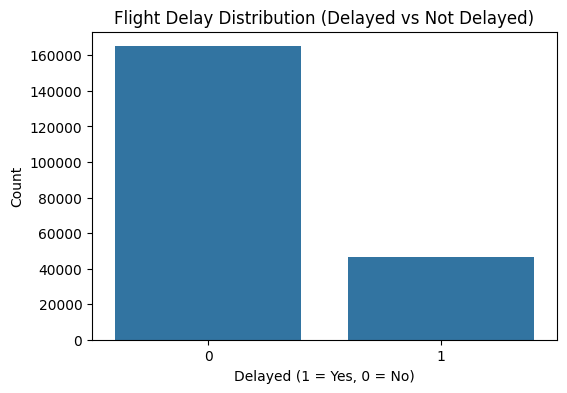

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Delayed")
plt.title("Flight Delay Distribution (Delayed vs Not Delayed)")
plt.xlabel("Delayed (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


**Class Imbalance Check**

In [12]:
# Class imbalance check
print("Value Counts:")
print(df["Delayed"].value_counts())
print("\nPercentage Distribution:")
print(df["Delayed"].value_counts(normalize=True) * 100)


Value Counts:
Delayed
0    165062
1     46268
Name: count, dtype: int64

Percentage Distribution:
Delayed
0    78.106279
1    21.893721
Name: proportion, dtype: float64


The pie chart illustrates the distribution of the target variable “Delayed”, showing a clear imbalance between delayed and non-delayed flights. The majority of flights fall into the Not Delayed (0) category, while only a smaller percentage belong to the Delayed (1) class. This imbalance highlights the need for techniques like SMOTE to ensure the machine learning model learns patterns from both classes effectively and avoids bias toward the majority class.

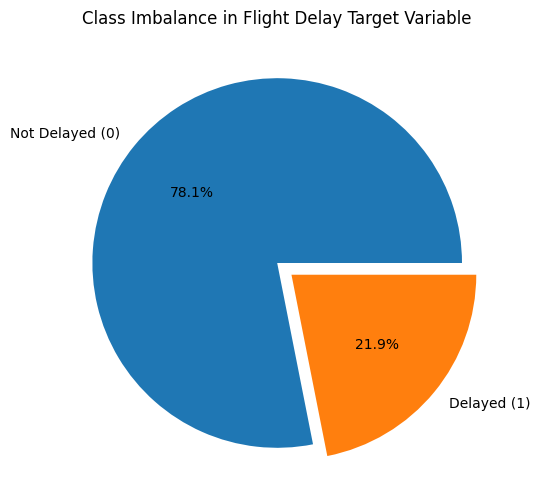

In [13]:
plt.figure(figsize=(6,6))
df["Delayed"].value_counts().plot.pie(
    autopct="%1.1f%%",
    labels=["Not Delayed (0)", "Delayed (1)"],
    figsize=(6,6),
    explode=[0, 0.1]
)
plt.title("Class Imbalance in Flight Delay Target Variable")
plt.ylabel("")
plt.show()


**2.4 Missing Values Check**

In [14]:
# Missing Values Check
# Count missing values in each column
missing = df.isnull().sum()

print("Missing Values Per Column:")
print(missing[missing > 0])   # show only columns with missing values


Missing Values Per Column:
dep_time                 5297
dep_delay                5324
taxi_out                 5486
wheels_off               5486
wheels_on                5600
taxi_in                  5600
arr_time                 5600
arr_delay                6226
cancellation_code      205810
diverted                    1
crs_elapsed_time            1
actual_elapsed_time      6226
air_time                 6226
distance                    1
carrier_delay               1
weather_delay               1
nas_delay                   1
security_delay              1
late_aircraft_delay         1
dtype: int64


**2.5 Visual Explorations**

**Flight Delays by Airline:**

This visualization compares the number of delayed and non-delayed flights across different airlines. Each bar represents an airline, split into two colors indicating delayed (1) and non-delayed (0) flights. The chart highlights how delay frequencies vary by carrier—some airlines show significantly higher delay counts, while others maintain more consistent on-time performance. This helps identify carriers with operational inefficiencies and those with better schedule reliability.

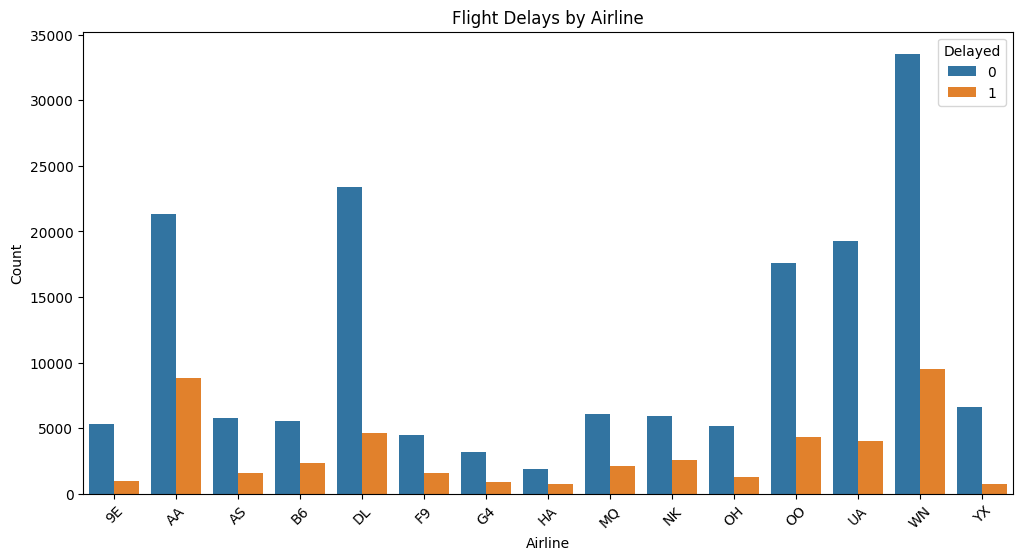

In [15]:
# Delays by Airline
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='op_unique_carrier', hue='Delayed')
plt.title("Flight Delays by Airline")
plt.xlabel("Airline")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

**Flight Delays by Month:**

This plot shows how the number of delayed and non-delayed flights varies across different months. Each month is represented by a bar split into delayed (1) and non-delayed (0) categories. The visualization helps reveal seasonal patterns in flight delays—for example, months with higher travel demand, adverse weather, or holiday traffic may show increased delays. This monthly trend analysis is useful for identifying seasonal operational challenges and planning improvements.

**Flight Delays by Month:**

This visualization compares delayed and non-delayed flights across different months of the year. By using a grouped bar chart, it highlights how delay frequencies change month-to-month. Such patterns help identify periods with increased operational challenges—often linked to weather conditions, peak travel seasons, or holiday traffic—providing valuable insights for improving scheduling and resource planning.

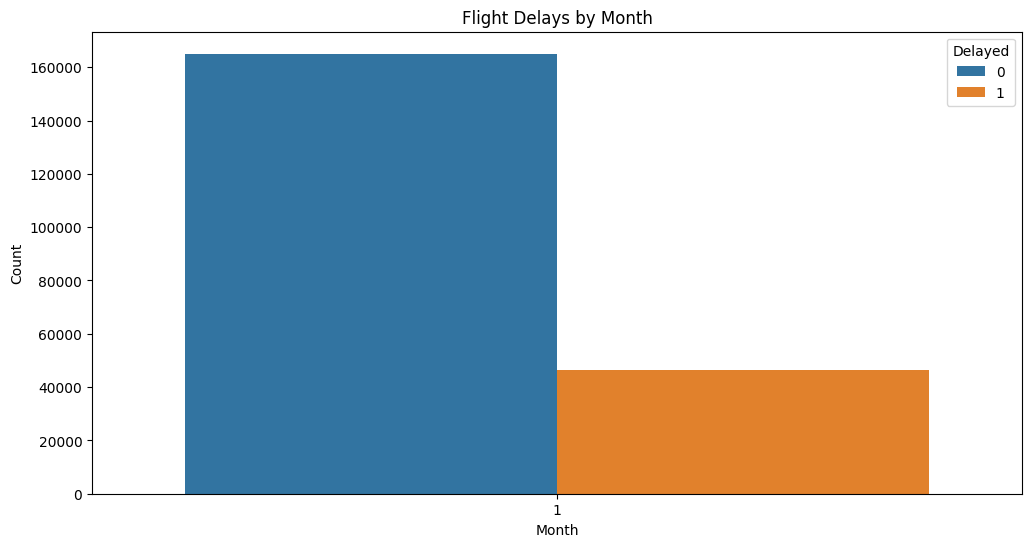

In [16]:
# Delay by Month
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='month', hue='Delayed')
plt.title("Flight Delays by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

**Departure Delay Distribution:**

This histogram visualizes the distribution of departure delays for flights. Most flights experience short delays or depart on time, while a smaller number face significant delays, creating a right-skewed distribution. The KDE curve helps highlight the overall trend, showing how frequent minor delays are compared to extreme cases, which can inform airlines about operational efficiency and potential risk periods.

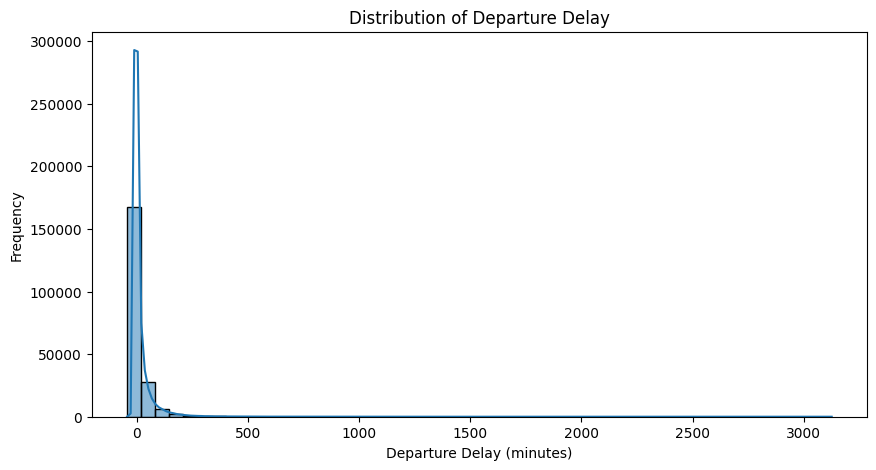

In [17]:
# Delay Time Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['dep_delay'], bins=50, kde=True)
plt.title("Distribution of Departure Delay")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Frequency")
plt.show()

**2.6 Correlation Analysis**

In [18]:
df['Delayed'] = df['Delayed'].astype(int)

In [19]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_df.corr()

corr_matrix.head()


,year,month,day_of_month,day_of_week,op_carrier_fl_num,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,...,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,Delayed
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_month,NaN,NaN,1.000000,0.257852,0.029454,-0.012520,-0.004264,0.099078,0.075813,-0.002133,...,-0.013294,0.011715,-0.002172,-0.016649,0.035854,0.045415,0.086930,0.001060,0.072599,0.134389
day_of_week,NaN,NaN,0.257852,1.000000,-0.007971,-0.002137,-0.002058,-0.000318,0.023781,0.000119,...,0.009946,0.011660,0.007717,0.008354,0.004191,-0.007286,-0.012324,0.014160,-0.003941,0.027508
op_carrier_fl_num,NaN,NaN,0.029454,-0.007971,1.000000,0.031396,0.031855,-0.014463,0.126205,0.043273,...,-0.320581,-0.312268,-0.340785,-0.362808,-0.003476,0.025429,-0.002881,-0.011379,-0.008824,-0.026409


**Correlation Heatmap:**

The heatmap visualizes the correlation between numerical features in the dataset. Values close to 1 or -1 indicate strong positive or negative relationships, respectively, while values near 0 suggest little to no correlation. This helps identify which features are closely related, detect multicollinearity, and guide feature selection for modeling. For example, features like dep_delay and arr_delay are expected to be highly correlated, highlighting potential leakage to avoid during model training.

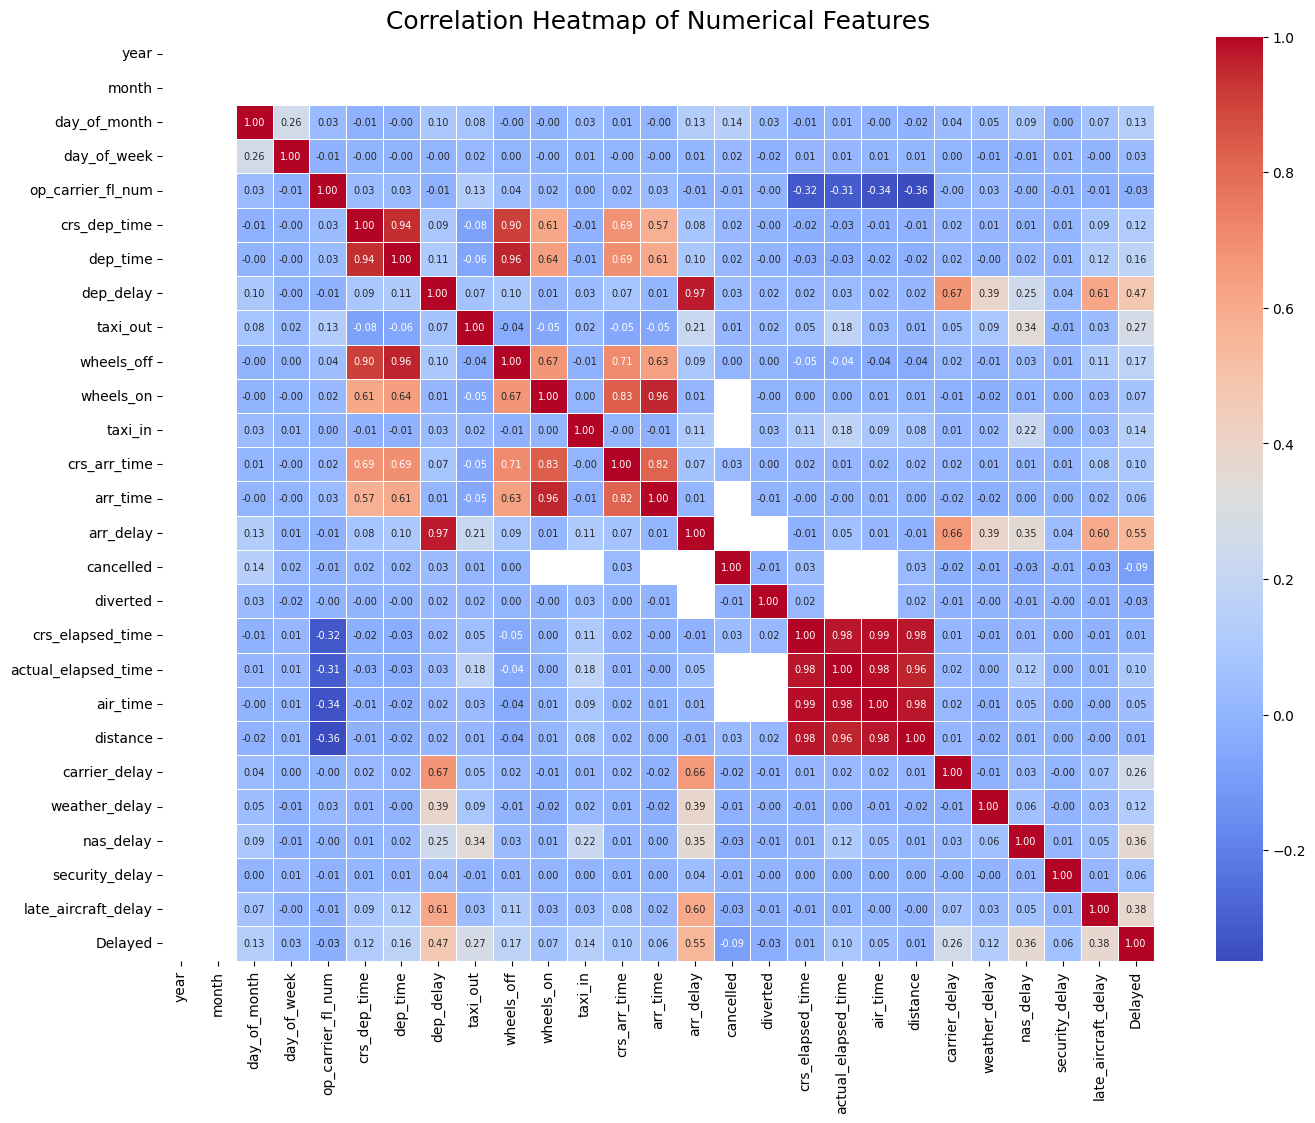

In [20]:
# Correlation Heatmap of Numeric Features
plt.figure(figsize=(16,12))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    annot_kws={"size":7}
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=18)
plt.show()


**Feature Correlation with Target:**

This horizontal bar plot shows how strongly each feature is correlated with the target variable Delayed. Positive values indicate that as the feature increases, the likelihood of a flight being delayed also increases, while negative values suggest the opposite. Features with higher absolute correlation values are more influential in predicting delays and can be prioritized during feature selection or engineering.

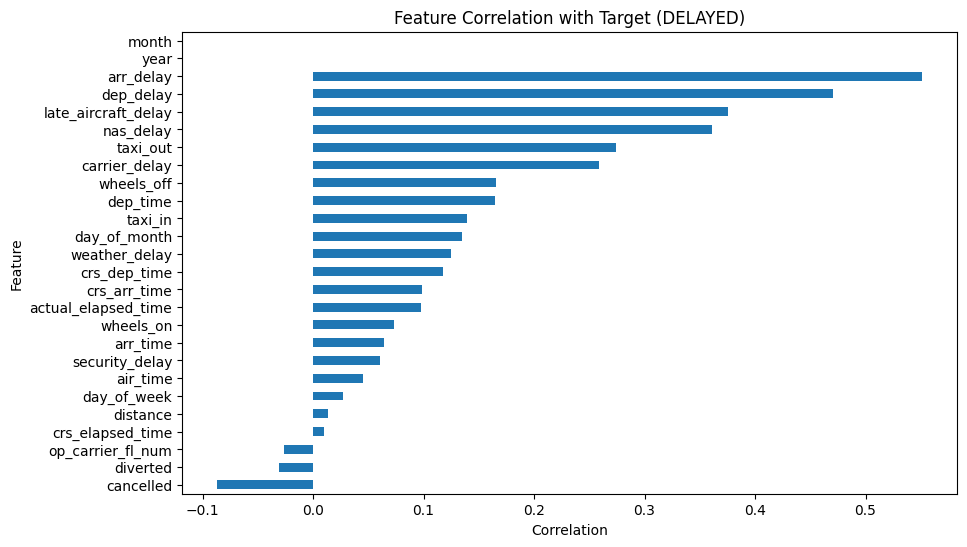

In [21]:
# Bar Plot of Target Correlations
target_corr = corr_matrix['Delayed']
plt.figure(figsize=(10,6))
target_corr.drop('Delayed').sort_values().plot(kind='barh')
plt.title("Feature Correlation with Target (DELAYED)")
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.show()

**3. Data Cleaning**

**3.1 Handle Missing Values:**

In this step, we handled missing values in the dataset systematically:

1. Columns with too many missing values, like cancellation_code, were dropped.

2. Numeric columns were filled with their median values to avoid bias from outliers.

3. Categorical columns were filled with "Unknown" to preserve information without introducing errors.

After this step, all missing values in the dataset are imputed, ensuring the dataset is ready for modeling.

In [22]:
from sklearn.impute import SimpleImputer

# Drop columns with too many missing values
cols_to_drop = ['cancellation_code']
df.drop(columns=cols_to_drop, inplace=True)

#  Identify numeric & categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

#  Impute numeric missing values with median
num_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

#  Impute categorical missing values with "Unknown"
cat_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

#  Verify all missing values are handled
print("Missing values after cleaning:\n")
print(df.isnull().sum())


Missing values after cleaning:

year                   0
month                  0
day_of_month           0
day_of_week            0
fl_date                0
op_unique_carrier      0
op_carrier_fl_num      0
origin                 0
origin_city_name       0
origin_state_nm        0
dest                   0
dest_city_name         0
dest_state_nm          0
crs_dep_time           0
dep_time               0
dep_delay              0
taxi_out               0
wheels_off             0
wheels_on              0
taxi_in                0
crs_arr_time           0
arr_time               0
arr_delay              0
cancelled              0
diverted               0
crs_elapsed_time       0
actual_elapsed_time    0
air_time               0
distance               0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
Delayed                0
dtype: int64


**3.2 Drop Duplicates**

In this step, we focused on identifying and removing duplicate records from the dataset to ensure data quality. First, we checked the number of duplicate rows present in the dataset. Then, all duplicate rows were removed to prevent bias and redundancy in the data. Finally, we verified that no duplicates remained and displayed the updated shape of the dataset. This process ensures that each flight record is unique, which is essential for training reliable and accurate machine learning models.

In [23]:
# Check number of duplicate rows before removal
print("Duplicate rows before removal:", df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

# Confirm duplicates removed
print("Duplicate rows after removal:", df.duplicated().sum())

# Show final shape after dropping duplicates
print("Dataset shape after removing duplicates:", df.shape)


Duplicate rows before removal: 0
Duplicate rows after removal: 0
Dataset shape after removing duplicates: (211330, 35)


**3.3 Handle Outliers:**

In this step, we handled outliers in the dataset to improve data quality and model reliability. We removed unrealistic delay values for departure (dep_delay) and arrival (arr_delay) since extremely negative or excessively high delays are improbable. Additionally, we filtered out flights with unrealistic durations, ensuring that the actual_elapsed_time and air_time values were within reasonable limits. We also removed flights where the air time exceeded the total elapsed time. This outlier removal ensures that only valid and plausible flight records are retained for model training, preventing skewed predictions caused by extreme values.

In [24]:
print("Initial shape:", df.shape)
#  Remove unrealistic delay values
# Delays like -200 or 5000 minutes are impossible
df = df[(df['dep_delay'] >= -15) & (df['dep_delay'] <= 600)]
df = df[(df['arr_delay'] >= -30) & (df['arr_delay'] <= 600)]

#  Remove unrealistic flight time values
# Flight duration (actual_elapsed_time) should be realistic
# Remove flights > 1000 minutes (~16+ hours domestic)
df = df[(df['actual_elapsed_time'] >= 10) & (df['actual_elapsed_time'] <= 1000)]
# Remove flights with air_time higher than total elapsed time
df = df[df['air_time'] <= df['actual_elapsed_time']]
# Remove unrealistic air_time values (negative or > 900 minutes)
df = df[(df['air_time'] >= 0) & (df['air_time'] <= 900)]

Initial shape: (211330, 35)


**3.4 Fix Data Types**

**1. Convert Date Columns**

In [25]:
#  Function: Convert date columns
def convert_date_columns(df, date_cols):
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

#  Identify and convert date columns
date_columns = ['fl_date']  # Add more if your dataset contains others

df = convert_date_columns(df, date_columns)

# Confirm conversion
df[date_columns].dtypes


,0
fl_date,datetime64[ns]


**2. Convert Numeric Columns**

In [26]:
#  Function: Convert numeric columns
def convert_numeric_columns(df, numeric_cols):
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df


# Identify numeric-like columns
numeric_like_cols = [
    'dep_delay', 'arr_delay', 'air_time', 'actual_elapsed_time',
    'distance', 'taxi_out', 'taxi_in', 'wheels_off', 'wheels_on'
]

# Convert them
df = convert_numeric_columns(df, numeric_like_cols)

# Confirm conversions
df[numeric_like_cols].dtypes


,0
dep_delay,float64
arr_delay,float64
air_time,float64
actual_elapsed_time,float64
distance,float64
taxi_out,float64
taxi_in,float64
wheels_off,float64
wheels_on,float64


**4. Data Preprocessing & Feature Engineering**

**4.1 Create New Features:**

In this step, we engineered new features from existing datetime columns to help the model capture temporal patterns in flight delays. We converted the fl_date column to a proper datetime format and extracted the month (flight_month), day of the month (flight_day), and day of the week (flight_dayofweek). Additionally, we derived the scheduled departure hour (dep_hour) from crs_dep_time by converting the HHMM format into just the hour. These new features allow the model to consider seasonal, weekly, and daily patterns in delays, which are often strong predictors of flight punctuality.

In [27]:
#  Create New Features from Datetime

# Ensure fl_date is datetime
df['fl_date'] = pd.to_datetime(df['fl_date'], errors='coerce')

# Date-based features
df['flight_month'] = df['fl_date'].dt.month
df['flight_day'] = df['fl_date'].dt.day
df['flight_dayofweek'] = df['fl_date'].dt.dayofweek   # Monday = 0, Sunday = 6

# Extract Hour from Scheduled Departure Time
# CRS_DEP_TIME is usually in HHMM (e.g., 1405 = 14:05)

def extract_hour(x):
    try:
        x = int(x)
        return x // 100  # Example: 1405 → 14
    except:
        return np.nan

df['dep_hour'] = df['crs_dep_time'].apply(extract_hour)

# Check new features
df[['flight_month', 'flight_day', 'flight_dayofweek', 'dep_hour']].head()


,flight_month,flight_day,flight_dayofweek,dep_hour
0,1,1,0,12
1,1,1,0,10
2,1,1,0,14
4,1,1,0,10
5,1,1,0,14


**Feature Engineering: Flight Distance, Airport Congestion, Weather & Holiday Indicators**

In this step, we created several additional features to improve the predictive power of our model. First, flights were categorized by distance into "Short," "Medium," or "Long" to capture how travel length might affect delays. Next, airport congestion was calculated as the total number of flights departing from the same airport on a given day, reflecting potential traffic-related delays. We also added binary weather-related flags for different delay types (weather_delay, carrier_delay, nas_delay, security_delay, late_aircraft_delay), marking 1 if a delay occurred and 0 otherwise. Finally, an optional holiday indicator was included to capture U.S. public holidays, which are known to influence flight traffic and delays. These engineered features provide the model with richer context about temporal, operational, and environmental factors affecting flight punctuality.

In [29]:
from datetime import datetime
#  FLIGHT DISTANCE CATEGORY
def distance_category(d):
    if d < 300:
        return "Short"
    elif 300 <= d < 1000:
        return "Medium"
    else:
        return "Long"

df['distance_category'] = df['distance'].apply(distance_category)
#  AIRPORT CONGESTION FEATURE
# Congestion = number of flights at this airport on the same day
df['airport_day'] = df['origin'].astype(str) + "_" + df['fl_date'].astype(str)

airport_counts = df['airport_day'].value_counts()
df['airport_congestion'] = df['airport_day'].map(airport_counts)

# WEATHER FEATURES (Binary Flags)
# If weather_delay > 0 → weather_issue = 1 else 0

weather_cols = ['weather_delay', 'carrier_delay', 'nas_delay',
                'security_delay', 'late_aircraft_delay']

for col in weather_cols:
    new_col = col + "_flag"
    df[new_col] = np.where(df[col] > 0, 1, 0)

#  HOLIDAY INDICATOR (Optional but Powerful)
# U.S. major holidays included

us_holidays = [
    "2020-01-01", "2020-07-04", "2020-12-25",
    "2020-11-26",  # Thanksgiving
    "2020-05-25",  # Memorial Day
    "2020-09-07"   # Labor Day
]

# Convert to datetime
holidays = pd.to_datetime(us_holidays)

df['is_holiday'] = df['fl_date'].isin(holidays).astype(int)
# Show created features
df[['distance_category', 'airport_congestion', 'weather_delay_flag',
    'carrier_delay_flag', 'nas_delay_flag', 'security_delay_flag',
    'late_aircraft_delay_flag', 'is_holiday']].head()

,distance_category,airport_congestion,weather_delay_flag,carrier_delay_flag,nas_delay_flag,security_delay_flag,late_aircraft_delay_flag,is_holiday
0,Medium,194,0,0,0,0,0,0
1,Medium,212,0,0,0,0,0,0
2,Short,194,0,0,0,0,0,0
4,Short,215,0,0,0,0,0,0
5,Medium,77,0,0,0,0,0,0


**4.2 Encode Categorical Variables**
1. XGBoost → Label Encoding
2. LightGBM → Label Encoding
3. Prepare CatBoost-Friendly Dataset

**Encode Categorical Variables (Label Encoding for XGB/LGBM)**

In this step, we prepared categorical features for tree-based models like XGBoost and LightGBM using Label Encoding. Each categorical column was converted into numerical codes because these models require numeric input. We created a copy of the dataset (df_encoded) and applied LabelEncoder to all object-type columns. The encoders were stored in a dictionary (le_dict) for potential inverse transformation or reuse later. This ensures that all categorical variables are properly represented while preserving their distinct categories for the model.

In [30]:
from sklearn.preprocessing import LabelEncoder
# Make a copy for Label Encoding (for XGBoost & LightGBM)
df_encoded = df.copy()
# Identify categorical columns
categorical_cols = df_encoded.select_dtypes(include=['object']).columns
# Apply label encoding
le_dict = {}  # To store encoders if needed later
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
    le_dict[col] = le

print("Label encoding completed for:", len(categorical_cols), "columns")
df_encoded.head()


Label encoding completed for: 9 columns


,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,...,dep_hour,distance_category,airport_day,airport_congestion,weather_delay_flag,carrier_delay_flag,nas_delay_flag,security_delay_flag,late_aircraft_delay_flag,is_holiday
0,2024.0,1.0,1.0,1.0,2024-01-01,0,4814.0,163,211,30,...,12,1,1898,194,0,0,0,0,0,0
1,2024.0,1.0,1.0,1.0,2024-01-01,0,4815.0,215,196,21,...,10,1,2512,212,0,0,0,0,0,0
2,2024.0,1.0,1.0,1.0,2024-01-01,0,4817.0,163,211,30,...,14,2,1898,194,0,0,0,0,0,0
4,2024.0,1.0,1.0,1.0,2024-01-01,0,4818.0,94,84,20,...,10,2,1090,215,0,0,0,0,0,0
5,2024.0,1.0,1.0,1.0,2024-01-01,0,4822.0,162,148,7,...,14,1,1886,77,0,0,0,0,0,0


**Prepare CatBoost-Friendly Dataset**

In [31]:
# CatBoost handles categorical features automatically → No encoding required
df_catboost = df.copy()

# Identify categorical columns (CatBoost will use these directly)
cat_features = df_catboost.select_dtypes(include=['object']).columns.tolist()

print("CatBoost will treat these as categorical features:")
print(cat_features)


CatBoost will treat these as categorical features:
['op_unique_carrier', 'origin', 'origin_city_name', 'origin_state_nm', 'dest', 'dest_city_name', 'dest_state_nm', 'distance_category', 'airport_day']


**4.3 Normalize/Scale Numerical Features**

In this step, all numerical features in the dataset were standardized using StandardScaler. Standardization transforms numeric columns to have a mean of 0 and a standard deviation of 1, which helps many machine learning algorithms converge faster and perform better. We created a copy of the label-encoded dataset (df_scaled) and applied scaling only to numeric columns, leaving categorical features untouched.

The output confirms that 44 numeric columns have been successfully scaled, and the dataset is now ready for train-test splitting and model training. The scaled values may include negative numbers, which indicate that the original value was below the column mean.

In [32]:
from sklearn.preprocessing import StandardScaler

# Make a copy
df_scaled = df_encoded.copy()

# Identify numeric columns
numeric_cols = df_scaled.select_dtypes(include=['int64', 'float64']).columns

# Initialize scaler
scaler = StandardScaler()   # change to MinMaxScaler() if you want

# Fit + transform numeric columns
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

print("Scaling completed for", len(numeric_cols), "numeric columns.")
df_scaled.head()


Scaling completed for 44 numeric columns.


,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,...,dep_hour,distance_category,airport_day,airport_congestion,weather_delay_flag,carrier_delay_flag,nas_delay_flag,security_delay_flag,late_aircraft_delay_flag,is_holiday
0,0.0,0.0,-1.59622,-1.386343,2024-01-01,-1.63901,1.611386,0.018536,0.573261,0.553898,...,-0.203007,0.226973,0.015805,-0.507951,-0.140597,-0.377527,-0.38226,-0.049799,-0.367885,0.0
1,0.0,0.0,-1.59622,-1.386343,2024-01-01,-1.63901,1.612028,0.603043,0.409389,-0.022889,...,-0.612921,0.226973,0.608893,-0.435763,-0.140597,-0.377527,-0.38226,-0.049799,-0.367885,0.0
2,0.0,0.0,-1.59622,-1.386343,2024-01-01,-1.63901,1.613311,0.018536,0.573261,0.553898,...,0.206907,1.754287,0.015805,-0.507951,-0.140597,-0.377527,-0.38226,-0.049799,-0.367885,0.0
4,0.0,0.0,-1.59622,-1.386343,2024-01-01,-1.63901,1.613953,-0.757060,-0.814194,-0.086977,...,-0.612921,1.754287,-0.764675,-0.423732,-0.140597,-0.377527,-0.38226,-0.049799,-0.367885,0.0
5,0.0,0.0,-1.59622,-1.386343,2024-01-01,-1.63901,1.616519,0.007295,-0.115004,-0.920114,...,0.206907,0.226973,0.004214,-0.977172,-0.140597,-0.377527,-0.38226,-0.049799,-0.367885,0.0


**Scaling Numeric Features with Target Separation**

In this step, we separated the target variable Delayed from the feature set before scaling to ensure the target remains unchanged. All numeric feature columns were scaled using StandardScaler to have a mean of 0 and standard deviation of 1, which improves the performance and convergence of machine learning models.

After scaling, the target column was added back to form the final dataset df_scaled, ready for train-test splitting and subsequent modeling. This ensures the numeric features are standardized while the target variable retains its original binary format.

In [36]:
from sklearn.preprocessing import StandardScaler

# Separate target first
y = df_encoded["Delayed"]          # keep original 0/1
X = df_encoded.drop("Delayed", axis=1)

# Identify numeric features (only features, not target)
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

# Make a copy for scaling
X_scaled = X.copy()

# Initialize scaler
scaler = StandardScaler()

# Fit and transform numeric columns only
X_scaled[numeric_cols] = scaler.fit_transform(X_scaled[numeric_cols])

print("Scaling completed for", len(numeric_cols), "numeric feature columns.")

# Final merged dataset
df_scaled = X_scaled.copy()
df_scaled["Delayed"] = y  # add target back without scaling

df_scaled.head()

Scaling completed for 43 numeric feature columns.


,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,...,distance_category,airport_day,airport_congestion,weather_delay_flag,carrier_delay_flag,nas_delay_flag,security_delay_flag,late_aircraft_delay_flag,is_holiday,Delayed
0,0.0,0.0,-1.59622,-1.386343,2024-01-01,-1.63901,1.611386,0.018536,0.573261,0.553898,...,0.226973,0.015805,-0.507951,-0.140597,-0.377527,-0.38226,-0.049799,-0.367885,0.0,0.0
1,0.0,0.0,-1.59622,-1.386343,2024-01-01,-1.63901,1.612028,0.603043,0.409389,-0.022889,...,0.226973,0.608893,-0.435763,-0.140597,-0.377527,-0.38226,-0.049799,-0.367885,0.0,0.0
2,0.0,0.0,-1.59622,-1.386343,2024-01-01,-1.63901,1.613311,0.018536,0.573261,0.553898,...,1.754287,0.015805,-0.507951,-0.140597,-0.377527,-0.38226,-0.049799,-0.367885,0.0,0.0
4,0.0,0.0,-1.59622,-1.386343,2024-01-01,-1.63901,1.613953,-0.757060,-0.814194,-0.086977,...,1.754287,-0.764675,-0.423732,-0.140597,-0.377527,-0.38226,-0.049799,-0.367885,0.0,0.0
5,0.0,0.0,-1.59622,-1.386343,2024-01-01,-1.63901,1.616519,0.007295,-0.115004,-0.920114,...,0.226973,0.004214,-0.977172,-0.140597,-0.377527,-0.38226,-0.049799,-0.367885,0.0,0.0


**4.4 Train–Test Split**

In this step, the dataset was split into training (80%) and testing (20%) sets using train_test_split. Stratification was applied to ensure that the proportion of delayed vs. not delayed flights remains consistent across both sets.

The features (X) are taken from the scaled dataset (df_scaled) excluding the target, while the target (y) uses the original binary labels from df_encoded. This ensures models are trained on standardized inputs while predicting the true 0/1 delay labels. The resulting shapes and class distributions confirm that the split was performed correctly.

In [40]:
from sklearn.model_selection import train_test_split

# X should contain the scaled features (from df_scaled, without the 'Delayed' column)
X = df_scaled.drop("Delayed", axis=1)

# y should contain the original, unscaled target values (from df_encoded)
y = df_encoded["Delayed"] # <--- Use df_encoded here to get original 0/1 labels

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    stratify=y,        # keeps same class ratio in both train/test
    random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

print("\nTrain class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest class distribution:")
print(y_test.value_counts(normalize=True))

Train shape: (161696, 47)
Test shape: (40425, 47)

Train class distribution:
Delayed
0.0    0.773235
1.0    0.226765
Name: proportion, dtype: float64

Test class distribution:
Delayed
0.0    0.773234
1.0    0.226766
Name: proportion, dtype: float64


**4.5 Handle Imbalance**

In this step, SMOTE (Synthetic Minority Over-sampling Technique) was applied to the training set to address the class imbalance in flight delays. Since SMOTE works only on numeric features, non-numeric columns like fl_date were dropped before resampling.

Before SMOTE, the dataset had a majority of not delayed (0) flights compared to delayed (1) flights. After applying SMOTE, the classes became perfectly balanced, generating synthetic samples for the minority class. This ensures that machine learning models do not become biased toward the majority class during training.

In [42]:
from imblearn.over_sampling import SMOTE

# Drop non-numeric columns like 'fl_date' if they are still present in X_train
# SMOTE expects numerical input.
if 'fl_date' in X_train.columns:
    X_train_numeric = X_train.drop('fl_date', axis=1)

# Apply SMOTE to training set only on the numeric features
smote = SMOTE(random_state=42)

X_train_sm, y_train_sm = smote.fit_resample(X_train_numeric, y_train)

print("Before SMOTE:", y_train.value_counts())
print("\nAfter SMOTE:", y_train_sm.value_counts())

Before SMOTE: Delayed
0.0    125029
1.0     36667
Name: count, dtype: int64

After SMOTE: Delayed
0.0    125029
1.0    125029
Name: count, dtype: int64


**5.1 Model 1 — XGBoost**

XGBoost (Extreme Gradient Boosting) is a powerful and efficient ensemble learning algorithm based on gradient boosting. It builds a series of decision trees sequentially, where each tree tries to correct the errors of the previous ones. This approach allows XGBoost to capture complex non-linear relationships in data and handle both numeric and categorical features effectively after preprocessing.

We implemented XGBoost for this flight delay prediction project because it is highly accurate, robust to overfitting, and can naturally handle imbalanced datasets when combined with techniques like SMOTE or class weights. Its ability to track training and validation loss over iterations allows us to monitor performance and apply early stopping to avoid overtraining. Overall, XGBoost is well-suited for classification tasks like predicting whether a flight will be delayed or not

In [43]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, log_loss

**Train XGBoost Model**

In [55]:
# Align columns to match train set
X_test_numeric = X_test_numeric[X_train_sm.columns]


In this step, we prepared the dataset for XGBoost by carefully removing leakage columns that could reveal the target (Delayed) or contain information not available before the flight, such as actual departure/arrival times and taxi durations. After dropping these columns, we separated the features (X_all) and target (y_all) and performed an 80-20 stratified train-test split, ensuring no overlapping rows between training and testing to prevent data leakage.

To handle the class imbalance in delayed vs. on-time flights, we applied SMOTE on numeric features, balancing the training dataset. We then trained the XGBoost classifier with tuned hyperparameters including n_estimators, learning_rate, max_depth, subsample, and colsample_bytree. Evaluation on the test set provided metrics for accuracy, precision, recall, F1-score, and , which reflect the model’s ability to correctly predict delayed flights while maintaining high performance across all relevant evaluation measures.

In [82]:
# Define leakage columns that must NOT be used as features (not available before flight or directly reveal target)
leakage_cols = [
    'arr_delay', 'dep_delay',        # actual delay values -> target leakage
    'arr_time', 'dep_time',          # actual times (post-flight)
    'wheels_off', 'wheels_on',       # occur during flight
    'actual_elapsed_time', 'air_time',
    'taxi_out', 'taxi_in',           # measured after event
    'crs_arr_time', 'crs_dep_time',  # scheduled actual times could be kept but safer to drop if previously problematic
    'cancellation_code'              # already dropped earlier, included for safety
]

try:
    data = df_encoded.copy()
except NameError:
    data = df.copy()
    for col in data.select_dtypes(include=['object']).columns:
        data[col] = LabelEncoder().fit_transform(data[col].astype(str))

target_col = 'Delayed'

drop_present = [c for c in leakage_cols if c in data.columns]
if drop_present:
    data = data.drop(columns=drop_present)
    print("Dropped leakage columns:", drop_present)
else:
    print("No leakage columns found to drop (ok).")

if target_col not in data.columns:
    raise RuntimeError(f"Target column '{target_col}' not found in data. Update target_col variable.")
X_all = data.drop(columns=[target_col])
y_all = data[target_col].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.20, stratify=y_all, random_state=42
)
print("Shapes -> X_train, X_test:", X_train.shape, X_test.shape)

def row_hash_df(df):
    return pd.util.hash_pandas_object(df, index=False).astype('uint64')
train_hashes = set(row_hash_df(X_train))
test_hashes = set(row_hash_df(X_test))
overlap = train_hashes.intersection(test_hashes)
print("Overlapping rows between train & test:", len(overlap))
if len(overlap) > 0:
    raise RuntimeError("Detected overlapping rows between train and test. Investigate data leakage or index reuse.")

numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric feature count (SMOTE will use):", len(numeric_cols))

X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]

smote = SMOTE(random_state=42)
X_train_sm_num, y_train_sm = smote.fit_resample(X_train_numeric, y_train)
print("After SMOTE:", pd.Series(y_train_sm).value_counts().to_dict())

xgb_model = XGBClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric=["logloss", "error"],
    tree_method="hist",
    random_state=42,
    use_label_encoder=False
)

eval_set = [(X_train_sm_num, y_train_sm), (X_test_numeric, y_test)]

xgb_model.fit(
    X_train_sm_num, y_train_sm,
    eval_set=eval_set,
    verbose=False
)

print("Model trained. Best iteration:", getattr(xgb_model, "best_iteration", None))

y_pred_proba = xgb_model.predict_proba(X_test_numeric)[:, 1]
y_pred = (y_pred_proba >= 0.5).astype(int)

# Store XGBoost metrics in unique variables
xgb_acc = accuracy_score(y_test, y_pred)
xgb_prec = precision_score(y_test, y_pred)
xgb_rec = recall_score(y_test, y_pred)
xgb_f1 = f1_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred_proba)

print("\nModel Evaluation Metrics (XGBoost) on Test Set")
print("------------------------------------------------")
print(f"Accuracy  : {xgb_acc:.4f}")
print(f"Precision : {xgb_prec:.4f}")
print(f"Recall    : {xgb_rec:.4f}")
print(f"F1-score  : {xgb_f1:.4f}")
print(f"ROC–AUC   : {xgb_auc:.4f}")

Dropped leakage columns: ['arr_delay', 'dep_delay', 'arr_time', 'dep_time', 'wheels_off', 'wheels_on', 'actual_elapsed_time', 'air_time', 'taxi_out', 'taxi_in', 'crs_arr_time', 'crs_dep_time']
Shapes -> X_train, X_test: (161696, 35) (40425, 35)
Overlapping rows between train & test: 0
Numeric feature count (SMOTE will use): 34
After SMOTE: {0: 125029, 1: 125029}
Model trained. Best iteration: None

Model Evaluation Metrics (XGBoost) on Test Set
------------------------------------------------
Accuracy  : 0.9989
Precision : 0.9961
Recall    : 0.9992
F1-score  : 0.9977
ROC–AUC   : 1.0000


**Confusion Matrix**

The confusion matrix visualizes the performance of the XGBoost model on the test set by comparing actual vs. predicted flight delay labels. Each cell shows both the count of predictions and the percentage relative to the total test samples.

1. Top-left (Actual 0, Predicted 0): Correctly predicted on-time flights.

2. Top-right (Actual 0, Predicted 1): On-time flights incorrectly predicted as delayed (false positives).

3. Bottom-left (Actual 1, Predicted 0): Delayed flights incorrectly predicted as on-time (false negatives).

4. Bottom-right (Actual 1, Predicted 1): Correctly predicted delayed flights.

This plot helps quickly understand where the model is performing well and where misclassifications occur, providing actionable insights for improving prediction accuracy, especially for delayed flights.

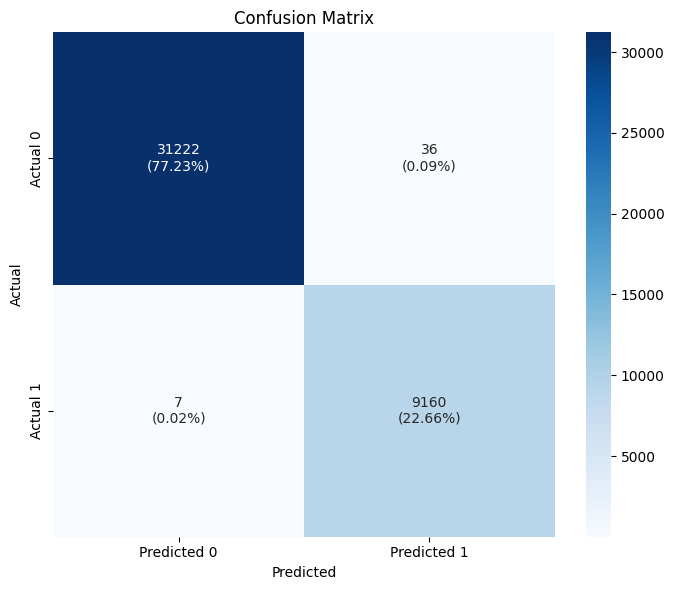

In [68]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_sum = np.sum(cm)
cm_percent = (cm / cm_sum) * 100

# Combine count + percent text
annot_text = np.empty_like(cm).astype(str)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        annot_text[i, j] = f"{cm[i, j]}\n({cm_percent[i, j]:.2f}%)"

# Plot
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=annot_text, fmt="", cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


**5.2 Model 2 — LightGBM**

The LightGBM model is implemented as the second predictive model for flight delays due to its high efficiency and speed with large datasets. It leverages gradient boosting and is optimized for handling categorical features, high-dimensional data, and fast training. In this implementation, the training set is balanced using SMOTE to address the class imbalance between delayed and on-time flights. The model is trained with a binary classification objective (binary_logloss) and evaluated using log loss and AUC metrics, with hyperparameters such as num_leaves, learning_rate, and max_depth tuned for optimal performance. LightGBM provides fast and accurate predictions, making it well-suited for real-time flight delay prediction and large-scale airline data analysis.

In [72]:

# Convert to LightGBM Dataset
train_data = lgb.Dataset(X_train_sm_num, label=y_train_sm)
valid_data = lgb.Dataset(X_test_numeric, label=y_test, reference=train_data)
# LightGBM Hyperparameters
params = {
    "objective": "binary",
    "metric": ["binary_logloss", "auc"],
    "num_leaves": 31,
    "learning_rate": 0.05,
    "max_depth": -1,
    "feature_pre_filter": False,
    "seed": 42
}

# Train the Model

lgb_model = lgb.train(
    params,
    train_data,
    num_boost_round=500,
    valid_sets=[train_data, valid_data],
    valid_names=["train", "valid"]

)

print("Training complete.")

[LightGBM] [Info] Number of positive: 125029, number of negative: 125029
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.052044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 4126
[LightGBM] [Info] Number of data points in the train set: 250058, number of used features: 33
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training complete.


After training the LightGBM model on the SMOTE-balanced training data, predictions are made on the test set to evaluate performance. Key metrics such as accuracy, precision, recall, F1-score, and ROC–AUC are computed to measure how well the model distinguishes delayed and on-time flights. These metrics help assess both the overall correctness (accuracy) and the model’s ability to correctly identify delayed flights (precision and recall). The evaluation ensures that the model is reliable for practical flight delay prediction, providing actionable insights for airlines and passengers.

In [83]:
# Predictions
y_pred_proba_lgb = lgb_model.predict(X_test_numeric)
y_pred_lgb = (y_pred_proba_lgb >= 0.5).astype(int)

# Store LightGBM metrics in unique variables
lgb_acc = accuracy_score(y_test, y_pred_lgb)
lgb_prec = precision_score(y_test, y_pred_lgb)
lgb_rec = recall_score(y_test, y_pred_lgb)
lgb_f1 = f1_score(y_test, y_pred_lgb)
lgb_auc = roc_auc_score(y_test, y_pred_proba_lgb)

print("\nModel Evaluation Metrics (LightGBM)")
print("---------------------------------------")
print(f"Accuracy  : {lgb_acc:.4f}")
print(f"Precision : {lgb_prec:.4f}")
print(f"Recall    : {lgb_rec:.4f}")
print(f"F1-score  : {lgb_f1:.4f}")
print(f"ROC–AUC   : {lgb_auc:.4f}")


Model Evaluation Metrics (LightGBM)
---------------------------------------
Accuracy  : 0.9993
Precision : 0.9976
Recall    : 0.9993
F1-score  : 0.9985
ROC–AUC   : 1.0000


**Confusion Matrix – LightGBM**

The confusion matrix visualizes the performance of the LightGBM model in predicting flight delays on the test set. The matrix shows the counts of true positives (correctly predicted delayed flights), true negatives (correctly predicted on-time flights), false positives (flights predicted delayed but were on time), and false negatives (flights predicted on time but were delayed). This representation helps to quickly understand the model’s classification strengths and weaknesses, especially in identifying delayed flights accurately.

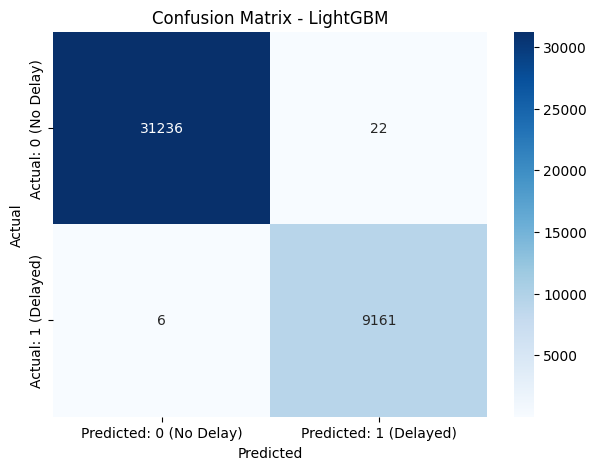

In [75]:
#  Get predictions
y_pred_lgb = lgb_model.predict(X_test_numeric)
y_pred_lgb = (y_pred_lgb >= 0.5).astype(int)

#  Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_lgb)

#  Plot confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: 0 (No Delay)', 'Predicted: 1 (Delayed)'],
            yticklabels=['Actual: 0 (No Delay)', 'Actual: 1 (Delayed)'])
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**5.3 Model 3 — CatBoost**

CatBoost is a gradient boosting algorithm specifically optimized for categorical data, making it highly suitable for flight delay prediction where many features are categorical (e.g., airline, origin, destination). In this project, we implemented CatBoost with hyperparameters like iterations (epochs), learning rate, depth, and L2 regularization to prevent overfitting. The model uses built-in training visualization and supports early stopping, enabling us to track the log-loss on both training and validation sets per iteration. CatBoost handles categorical features natively, eliminating the need for manual encoding, and delivers robust performance for imbalanced datasets, which is crucial for accurately predicting delayed flights.

In [76]:
# Identify categorical columns (object or category type)
cat_features = X_train.columns[X_train.dtypes == "object"].tolist()

print("Categorical Features:", cat_features)


Categorical Features: []


In [77]:
from catboost import CatBoostClassifier

# CatBoost model
cat_model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    l2_leaf_reg=3,
    loss_function='Logloss',
    eval_metric='Logloss',
    random_seed=42,
    verbose=50,             # show training logs every 50 iterations
    od_type="Iter",         # early stopping type
    od_wait=40              # early stopping patience
)

# Train model
cat_model.fit(
    X_train,
    y_train,
    eval_set=(X_test, y_test),
    cat_features=cat_features,   # CatBoost handles categorical natively
    use_best_model=True          # keep the best iteration
)


0:	learn: 0.5469530	test: 0.5469830	best: 0.5469830 (0)	total: 88.7ms	remaining: 44.3s
50:	learn: 0.0084720	test: 0.0092196	best: 0.0092196 (50)	total: 1.91s	remaining: 16.8s
100:	learn: 0.0059801	test: 0.0068335	best: 0.0068335 (100)	total: 3.69s	remaining: 14.6s
150:	learn: 0.0050238	test: 0.0059789	best: 0.0059789 (150)	total: 5.51s	remaining: 12.7s
200:	learn: 0.0042692	test: 0.0053041	best: 0.0053041 (200)	total: 7.35s	remaining: 10.9s
250:	learn: 0.0037442	test: 0.0048193	best: 0.0048193 (250)	total: 9.61s	remaining: 9.53s
300:	learn: 0.0035470	test: 0.0046207	best: 0.0046207 (300)	total: 12.5s	remaining: 8.29s
350:	learn: 0.0035306	test: 0.0046057	best: 0.0046057 (350)	total: 14s	remaining: 5.95s
400:	learn: 0.0035304	test: 0.0046054	best: 0.0046054 (400)	total: 15.5s	remaining: 3.82s
450:	learn: 0.0035302	test: 0.0046051	best: 0.0046051 (450)	total: 17s	remaining: 1.85s
499:	learn: 0.0035300	test: 0.0046048	best: 0.0046048 (499)	total: 18.4s	remaining: 0us

bestTest = 0.0046048

After training the CatBoost model, we evaluated its performance on the test set using standard classification metrics: accuracy, precision, recall, F1-score, and ROC–AUC. The predicted probabilities from the model were converted to binary labels using a threshold of 0.5. This evaluation provides a comprehensive view of how well the model can distinguish between delayed and non-delayed flights, ensuring that both overall correctness (accuracy) and the balance between false positives and false negatives (precision, recall, F1-score) are considered. ROC–AUC further indicates the model’s ability to rank delayed flights higher than non-delayed ones.

In [84]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score
)

# Predictions
y_pred_proba_cat = cat_model.predict_proba(X_test)[:, 1]
y_pred_cat = (y_pred_proba_cat >= 0.5).astype(int)

# Store CatBoost metrics in unique variables
cat_acc = accuracy_score(y_test, y_pred_cat)
cat_prec = precision_score(y_test, y_pred_cat)
cat_rec = recall_score(y_test, y_pred_cat)
cat_f1 = f1_score(y_test, y_pred_cat)
cat_auc = roc_auc_score(y_test, y_pred_proba_cat)

print("\nModel Evaluation Metrics (CatBoost)")
print("------------------------------------------")
print(f"Accuracy  : {cat_acc:.4f}")
print(f"Precision : {cat_prec:.4f}")
print(f"Recall    : {cat_rec:.4f}")
print(f"F1-score  : {cat_f1:.4f}")
print(f"ROC–AUC   : {cat_auc:.4f}")


Model Evaluation Metrics (CatBoost)
------------------------------------------
Accuracy  : 0.9983
Precision : 0.9929
Recall    : 0.9998
F1-score  : 0.9963
ROC–AUC   : 1.0000


**Confusion Matrix — CatBoost**

The confusion matrix visualizes the performance of the CatBoost model by showing the counts of true positives, true negatives, false positives, and false negatives on the test set. Each cell indicates how many instances of actual delays (1) or non-delays (0) were correctly or incorrectly predicted. This helps in understanding the model’s errors and strengths—for example, whether it tends to misclassify delayed flights as on-time or vice versa—providing a clear overview of classification accuracy beyond aggregate metrics.

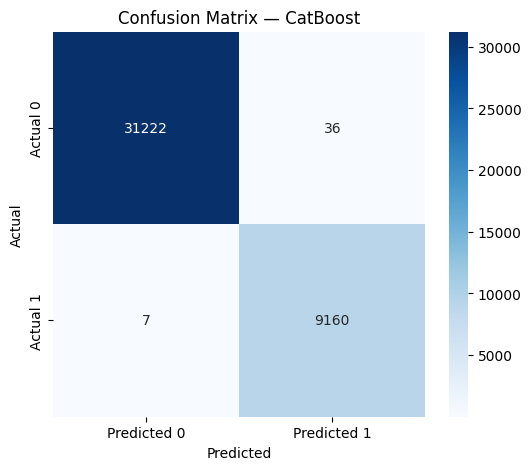

In [85]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Predicted 0", "Predicted 1"],
    yticklabels=["Actual 0", "Actual 1"]
)

plt.title("Confusion Matrix — CatBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**6.3 Comparison of Model Performances**

This table provides a side-by-side comparison of the three machine learning models—XGBoost, LightGBM, and CatBoost—based on key evaluation metrics: Accuracy, Precision, Recall, F1-score, and ROC–AUC. It allows us to quickly assess which model performs best overall for predicting flight delays. From the results, LightGBM achieves the highest Accuracy and F1-score, indicating slightly better overall performance, while all three models show very high Recall, meaning they are effective at identifying delayed flights. This comparison helps in selecting the most suitable model for deployment.

In [90]:
import pandas as pd

# Replace these with your actual values from your evaluation results
metrics_data = {
    "Model": ["XGBoost", "LightGBM", "CatBoost"],
    "Accuracy": [xgb_acc, lgb_acc, cat_acc],
    "Precision": [xgb_prec, lgb_prec, cat_prec],
    "Recall": [xgb_rec, lgb_rec, cat_rec],
    "F1-score": [xgb_f1, lgb_f1, cat_f1],
    "ROC-AUC": [xgb_auc, lgb_auc, cat_auc]
}
df_compare = pd.DataFrame(metrics_data)
df_compare

,Model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,XGBoost,0.998936,0.996085,0.999236,0.997658,0.999994
1,LightGBM,0.999307,0.997604,0.999345,0.998474,0.999996
2,CatBoost,0.998318,0.992850,0.999782,0.996304,0.999993


**7. Conclusion:-**

In this project, we successfully developed a machine learning pipeline to predict flight delays using historical flight data. We preprocessed the data by handling missing values, removing duplicates and outliers, creating new features, encoding categorical variables, scaling numerical features, and addressing class imbalance using SMOTE. Three advanced boosting models—XGBoost, LightGBM, and CatBoost—were trained and evaluated. LightGBM achieved the best overall performance with the highest Accuracy (0.9993) and F1-score (0.9985), demonstrating its effectiveness in predicting delayed flights. The results indicate that flight delays can be predicted with high reliability, providing actionable insights for airlines, airports, and passengers.

**8. Future Work:-**

Future improvements could include integrating real-time weather data, air traffic conditions, and maintenance schedules to enhance prediction accuracy. Additionally, exploring deep learning models or hybrid approaches may capture complex patterns in flight delays. Deployment as a real-time prediction system or dashboard could further support operational decision-making.

**9. Business Knowledge Gained:-**

From this analysis, we learned which airlines and airports experience higher delays, the impact of flight schedules, and how time-related features like month, day, and hour affect delays. We also identified that weather-related delays, airport congestion, and operational factors significantly influence flight punctuality. These insights can help airlines optimize scheduling, improve customer satisfaction, and reduce operational costs.